### Imports

In [18]:
from tqdm import tqdm
from utils.utils import *

import networkx as nx
import numpy as np
import pandas as pd
import os
import sys

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.29 ms (started: 2023-05-30 18:09:07 -05:00)


### Parameters

In [19]:
# get nodes
# common_nodes = list(df_join_raw.index)
nodes = [
# 59.0137,
71.0139,
# 74.0249,
85.0296,
87.0086,
88.0405,
89.0245,
# 101.0243,
# 102.0562,
# 109.0407,
115.0038,
# 117.0195,
118.051,
118.9807,
122.0247,
# 129.0192,
130.0506,
# 130.0875,
131.0355,
131.0824,
132.0303,
133.014,
135.0311,
145.0144,
145.0984,
146.0458,
147.0297,
151.0403,
152.0354,
154.062,
166.0506,
166.9758,
# 171.0302,
173.0095,
173.0454,
179.0561,
184.0021,
218.1033,
249.0552,
259.0227,
# 266.0886,
316.2857,
323.0277,
338.9889,
346.0558,
362.0509,
367.0185,
# 388.9441,
401.0173,
426.0221,
489.9937,
505.9889,
521.984,
606.0744,
664.117,
766.1076,
784.1495,
808.118,
808.118
]

time: 1.74 ms (started: 2023-05-30 18:09:07 -05:00)


In [20]:
import json
  
# Opening JSON file
file = open("parameters.json")
params = json.load(file)

dir = os.path.dirname(os.getcwd())
print(dir)

group = params["group"][params["group_idx"]]
print("Group:\t\t", group)

/home/ealvarez/Project/GNN_Filter
Group:		 ['WT', 5]
time: 2.88 ms (started: 2023-05-30 18:09:07 -05:00)


### Load dataset

In [21]:
# Load dataset
df_process1 = pd.read_csv("{}/input/Edwin_proyecto2/Edwin_Set2-raw_w1.csv".format(dir))
df_process1 = df_process1.iloc[:, 1:]
df_process1.set_index("ionMz", inplace=True)
df_process1 = df_process1.loc[nodes]
# df_process1.loc[71.0139] = [3226] * len(df_process1.columns)
df_process1.head()

,WT1,WT1.1,WT1.2,WT1.3,WT1.4,WT1.5,WT1.6,WT1.7,WT1.8,WT1.9,...,WT1.30,WT1.31,WT1.32,WT1.33,WT1.34,WT1.35,WT1.36,WT1.37,WT1.38,WT1.39
ionMz,,,,,,,,,,,,,,,,,,,,,
71.0139,3226,2566,4663,3143,3906,3104,3963,2319,4537,5405,...,2752,2552,2685,2367,2034,3078,2297,2625,2513,3478
85.0296,2746,2009,2667,3056,2848,3365,5060,1736,5097,4085,...,2519,2208,2520,2805,2287,3156,2360,2461,2905,3226
87.0086,4857,2743,2437,2975,2172,2051,5582,3133,3357,6798,...,3084,2198,4780,2067,4453,3824,4021,2565,3223,4805
88.0405,1241,1937,3196,2804,1981,2207,3893,1637,3128,4052,...,2925,3147,1624,1649,1988,2044,3091,1425,2543,2433
89.0245,6628,3563,5254,3562,4957,3431,4729,3887,5943,7349,...,4126,4744,5013,3283,3752,3441,4244,3637,3968,4120


time: 31.6 ms (started: 2023-05-30 18:09:08 -05:00)


In [22]:
# Load dataset
df_process2 = pd.read_csv("{}/input/Edwin_proyecto2/Edwin_Set2-raw_w2.csv".format(dir))
df_process2 = df_process2.iloc[:, 1:]
df_process2.set_index("ionMz", inplace=True)
df_process2 = df_process2.loc[nodes]
# df_process2.loc[71.0139] = [3226] * len(df_process2.columns)
df_process2.head()

,WT2,WT2.1,WT2.2,WT2.3,WT2.4,WT2.5,WT2.6,WT2.7,WT2.8,WT2.9,...,WT2.30,WT2.31,WT2.32,WT2.33,WT2.34,WT2.35,WT2.36,WT2.37,WT2.38,WT2.39
ionMz,,,,,,,,,,,,,,,,,,,,,
71.0139,1438,570,577,1272,1060,2181,1447,2181,1018,2682,...,1536,1261,1139,1295,1345,560,1580,1415,1293,1161
85.0296,1167,518,1260,1565,1345,660,2002,1902,1242,1842,...,964,1579,1934,983,1319,1305,1335,1608,1282,1531
87.0086,1646,1068,1095,1673,1596,2976,1447,2023,1016,2861,...,1879,1878,1668,1209,1825,2610,1047,1339,1607,1807
88.0405,1008,598,585,1085,1293,679,1103,1892,2056,1829,...,1071,369,966,1353,1131,995,1552,1095,1422,1383
89.0245,2265,1401,3965,2718,2496,2777,2332,3826,2722,2021,...,3406,2261,2650,3330,1713,2416,2456,2562,2361,2888


time: 44.8 ms (started: 2023-05-30 18:09:08 -05:00)


In [23]:
# Load dataset
df_process3 = pd.read_csv("{}/input/Edwin_proyecto2/Edwin_Set2-raw_w3.csv".format(dir))
df_process3 = df_process3.iloc[:, 1:]
df_process3.set_index("ionMz", inplace=True)
df_process3 = df_process3.loc[nodes]
# df_process3.loc[71.0139] = [3226] * len(df_process3.columns)
df_process3.head()

,WT3,WT3.1,WT3.2,WT3.3,WT3.4,WT3.5,WT3.6,WT3.7,WT3.8,WT3.9,...,WT3.29,WT3.30,WT3.31,WT3.32,WT3.33,WT3.34,WT3.35,WT3.36,WT3.37,WT3.38
ionMz,,,,,,,,,,,,,,,,,,,,,
71.0139,3975,4459,3010,5131,3763,3531,5529,3635,3345,3236,...,1812,914,1755,926,1886,1930,1520,1923,1762,819
85.0296,5263,8859,5234,4691,5587,7183,7408,3505,4662,6115,...,1161,847,2194,1319,1563,1788,2386,1019,1561,913
87.0086,3736,3687,3093,3117,3106,3786,3318,2536,2139,3897,...,1738,2175,2186,2751,2532,2598,1733,1851,1643,1462
88.0405,319,1420,1181,620,555,1018,1055,879,993,1221,...,844,1054,1251,1539,1580,1621,1440,1271,1093,1147
89.0245,11235,12996,11696,11548,10749,12655,13791,7695,11204,12293,...,2206,1815,3186,2508,2486,3307,2114,2654,2036,4119


time: 45.5 ms (started: 2023-05-30 18:09:08 -05:00)


In [24]:
# Load dataset
df_process4 = pd.read_csv("{}/input/Edwin_proyecto2/Edwin_Set2-raw_w4.csv".format(dir))
df_process4 = df_process4.iloc[:, 1:]
df_process4.set_index("ionMz", inplace=True)
df_process4 = df_process4.loc[nodes]
# df_process4.loc[71.0139] = [3226] * len(df_process4.columns)
df_process4.head()

,WT4,WT4.1,WT4.2,WT4.3,WT4.4,WT4.5,WT4.6,WT4.7,WT4.8,WT4.9,...,WT4.30,WT4.31,WT4.32,WT4.33,WT4.34,WT4.35,WT4.36,WT4.37,WT4.38,WT4.39
ionMz,,,,,,,,,,,,,,,,,,,,,
71.0139,6168,6301,6936,4083,5853,4627,4937,5001,3585,4723,...,2144,2489,2302,3185,2674,1979,1468,1994,2261,1284
85.0296,6194,8699,5653,5442,5475,4541,6812,7703,7087,5872,...,1568,2363,2704,2763,3166,2970,2956,1672,2176,1943
87.0086,4885,4312,4079,2879,4302,2405,4547,3937,2702,3272,...,2043,3031,2524,2411,2815,2625,1781,1449,2478,1252
88.0405,4851,2855,3901,2881,3946,2875,3416,5050,3631,3457,...,1741,2448,2491,1617,1947,2164,714,1809,2143,2062
89.0245,10580,10550,11817,7733,10803,6624,10728,11536,9497,11892,...,3217,2576,5463,3983,3401,3545,4069,2824,3828,3465


time: 44.6 ms (started: 2023-05-30 18:09:09 -05:00)


In [25]:
# Load dataset
df_process5 = pd.read_csv("{}/input/Edwin_proyecto2/Edwin_Set2-raw_w5.csv".format(dir))
df_process5 = df_process5.iloc[:, 1:]
df_process5.set_index("ionMz", inplace=True)
df_process5 = df_process5.loc[nodes]
# df_process5.loc[71.0139] = [3226] * len(df_process5.columns)
df_process5.head()

,WT5,WT5.1,WT5.2,WT5.3,WT5.4,WT5.5,WT5.6,WT5.7,WT5.8,WT5.9,...,WT5.30,WT5.31,WT5.32,WT5.33,WT5.34,WT5.35,WT5.36,WT5.37,WT5.38,WT5.39
ionMz,,,,,,,,,,,,,,,,,,,,,
71.0139,3374,3072,4576,5151,3570,2820,2708,4796,4631,4269,...,3938,3487,3386,2981,2923,3153,2710,3767,3228,3494
85.0296,6047,2280,4410,6444,4622,5262,3561,5820,4795,3701,...,5415,3566,4242,6007,4749,5689,4941,3004,4815,5440
87.0086,4197,2315,2633,4119,4185,3510,2463,3269,3819,3775,...,2436,2485,3520,3817,2307,3400,4784,3347,3654,2364
88.0405,928,624,1805,1165,1288,1331,500,1298,1169,354,...,1545,2495,1946,2381,1517,2862,1848,1311,1631,2159
89.0245,10057,3746,12081,11162,11034,9863,11109,12441,11379,11868,...,7648,8570,7451,9208,6221,8805,9104,6897,6161,8168


time: 44.4 ms (started: 2023-05-30 18:09:09 -05:00)


In [26]:
# Load dataset
df_process6 = pd.read_csv("{}/input/Edwin_proyecto2/Edwin_Set2-raw_w6.csv".format(dir))
# df_process6 = df_process6.iloc[:, 1:]
df_process6.set_index("ionMz", inplace=True)
df_process6 = df_process6.loc[nodes]
df_process6.loc[71.0139] = [3226] * len(df_process6.columns)
df_process6.head()

,WT6,WT6.1,WT6.2,WT6.3,WT6.4,WT6.5,WT6.6,WT6.7,WT6.8,WT6.9
ionMz,,,,,,,,,,
71.0139,3226,3226,3226,3226,3226,3226,3226,3226,3226,3226
85.0296,1042,1228,1054,914,872,1086,324,382,565,445
87.0086,1294,1531,2448,2578,1812,2250,1500,1614,1669,1684
88.0405,1940,990,1928,1633,1348,1787,981,1556,1362,1628
89.0245,2755,2511,1608,2480,2306,1131,1482,1338,1951,2079


time: 19.6 ms (started: 2023-05-30 18:09:09 -05:00)


In [27]:
df_process = pd.concat([df_process1, df_process2.iloc[:, 1:], df_process3.iloc[:, 1:], df_process4.iloc[:, 1:], df_process5.iloc[:, 1:]], axis=1)
df_process.head()

,WT1,WT1.1,WT1.2,WT1.3,WT1.4,WT1.5,WT1.6,WT1.7,WT1.8,WT1.9,...,WT5.30,WT5.31,WT5.32,WT5.33,WT5.34,WT5.35,WT5.36,WT5.37,WT5.38,WT5.39
ionMz,,,,,,,,,,,,,,,,,,,,,
71.0139,3226,2566,4663,3143,3906,3104,3963,2319,4537,5405,...,3938,3487,3386,2981,2923,3153,2710,3767,3228,3494
85.0296,2746,2009,2667,3056,2848,3365,5060,1736,5097,4085,...,5415,3566,4242,6007,4749,5689,4941,3004,4815,5440
87.0086,4857,2743,2437,2975,2172,2051,5582,3133,3357,6798,...,2436,2485,3520,3817,2307,3400,4784,3347,3654,2364
88.0405,1241,1937,3196,2804,1981,2207,3893,1637,3128,4052,...,1545,2495,1946,2381,1517,2862,1848,1311,1631,2159
89.0245,6628,3563,5254,3562,4957,3431,4729,3887,5943,7349,...,7648,8570,7451,9208,6221,8805,9104,6897,6161,8168


time: 9.15 ms (started: 2023-05-30 18:09:10 -05:00)


In [28]:
df_raw_log = df_process.copy()
for column in df_process.columns:
  df_raw_log[column] = np.log10(df_process[column])

df_raw_log.head()

,WT1,WT1.1,WT1.2,WT1.3,WT1.4,WT1.5,WT1.6,WT1.7,WT1.8,WT1.9,...,WT5.30,WT5.31,WT5.32,WT5.33,WT5.34,WT5.35,WT5.36,WT5.37,WT5.38,WT5.39
ionMz,,,,,,,,,,,,,,,,,,,,,
71.0139,3.508664,3.409257,3.668665,3.497344,3.591732,3.491922,3.598024,3.365301,3.656769,3.732796,...,3.595276,3.542452,3.529687,3.474362,3.465829,3.498724,3.432969,3.575996,3.508934,3.543323
85.0296,3.438701,3.302980,3.426023,3.485153,3.454540,3.526985,3.704151,3.239550,3.707315,3.611192,...,3.733598,3.552181,3.627571,3.778658,3.676602,3.755036,3.693815,3.477700,3.682596,3.735599
87.0086,3.686368,3.438226,3.386856,3.473487,3.336860,3.311966,3.746790,3.495960,3.525951,3.832381,...,3.386677,3.395326,3.546543,3.581722,3.363048,3.531479,3.679791,3.524656,3.562769,3.373647
88.0405,3.093772,3.287130,3.504607,3.447778,3.296884,3.343802,3.590284,3.214049,3.495267,3.607669,...,3.188928,3.397071,3.289143,3.376759,3.180986,3.456670,3.266702,3.117603,3.212454,3.334253
89.0245,3.821382,3.551816,3.720490,3.551694,3.695219,3.535421,3.674769,3.589615,3.774006,3.866228,...,3.883548,3.932981,3.872215,3.964165,3.793860,3.944729,3.959232,3.838660,3.789651,3.912116


time: 65.4 ms (started: 2023-05-30 18:09:10 -05:00)


In [29]:
subgroups = ['1', '2', '3', '4', '5']

time: 563 µs (started: 2023-05-30 18:09:12 -05:00)


In [30]:
# Split graph

list_raw = []

for item in subgroups:
  list_raw.append(df_raw_log.filter(like="{}{}.".format(group[0], item), axis=1))

# list_raw = [df_raw_log] # only for create one graph
print(len(list_raw))
list_raw[0].head()

5


,WT1.1,WT1.2,WT1.3,WT1.4,WT1.5,WT1.6,WT1.7,WT1.8,WT1.9,WT1.10,...,WT1.30,WT1.31,WT1.32,WT1.33,WT1.34,WT1.35,WT1.36,WT1.37,WT1.38,WT1.39
ionMz,,,,,,,,,,,,,,,,,,,,,
71.0139,3.409257,3.668665,3.497344,3.591732,3.491922,3.598024,3.365301,3.656769,3.732796,3.511081,...,3.439648,3.406881,3.428944,3.374198,3.308351,3.488269,3.361161,3.419129,3.400192,3.541330
85.0296,3.302980,3.426023,3.485153,3.454540,3.526985,3.704151,3.239550,3.707315,3.611192,3.766041,...,3.401228,3.343999,3.401401,3.447933,3.359266,3.499137,3.372912,3.391112,3.463146,3.508664
87.0086,3.438226,3.386856,3.473487,3.336860,3.311966,3.746790,3.495960,3.525951,3.832381,3.661623,...,3.489114,3.342028,3.679428,3.315340,3.648653,3.582518,3.604334,3.409087,3.508260,3.681693
88.0405,3.287130,3.504607,3.447778,3.296884,3.343802,3.590284,3.214049,3.495267,3.607669,3.301898,...,3.466126,3.497897,3.210586,3.217221,3.298416,3.310481,3.490099,3.153815,3.405346,3.386142
89.0245,3.551816,3.720490,3.551694,3.695219,3.535421,3.674769,3.589615,3.774006,3.866228,4.032740,...,3.615529,3.676145,3.700098,3.516271,3.574263,3.536685,3.627775,3.560743,3.598572,3.614897


time: 31.6 ms (started: 2023-05-30 18:09:15 -05:00)


In [31]:
# Transpose

list_raw_t = []
for k in range(len(list_raw)):
  list_raw_t.append(transpose(list_raw[k]))

print(len(list_raw_t))
list_raw_t[0].head()

5


ionMz,71.0139,85.0296,87.0086,88.0405,89.0245,115.0038,118.0510,118.9807,122.0247,130.0506,...,426.0221,489.9937,505.9889,521.9840,606.0744,664.1170,766.1076,784.1495,808.1180,808.1180
0,3.409257,3.302980,3.438226,3.287130,3.551816,3.819676,4.955375,4.019822,3.602819,3.265761,...,5.097261,3.627878,5.144680,4.381115,4.735926,4.093562,3.639188,3.371437,3.712986,3.712986
1,3.668665,3.426023,3.386856,3.504607,3.720490,4.129271,5.147212,4.064533,3.764326,3.347330,...,5.186663,3.626648,5.209654,4.468229,4.889341,4.205475,3.783689,3.597914,3.803525,3.803525
2,3.497344,3.485153,3.473487,3.447778,3.551694,3.914290,4.998634,4.075364,3.724685,3.170848,...,5.084937,3.577032,5.134601,4.316411,4.725471,4.132003,3.663230,3.330008,3.586587,3.586587
3,3.591732,3.454540,3.336860,3.296884,3.695219,3.977906,5.056634,4.072948,3.716671,3.171141,...,5.163796,3.760422,5.222368,4.457746,4.859150,4.184123,3.793721,3.440437,3.792181,3.792181
4,3.491922,3.526985,3.311966,3.343802,3.535421,3.804753,4.912971,4.034428,3.681151,3.143951,...,5.090484,3.749891,5.136828,4.376650,4.762041,4.136689,3.783117,3.516139,3.674218,3.674218


time: 22.7 ms (started: 2023-05-30 18:09:19 -05:00)


In [32]:
# Correlation matrix

list_raw_corr = []
for df in tqdm(list_raw_t):
  matrix = df.corr(method="pearson") # pearson, kendall, spearman
  list_raw_corr.append(matrix)

print(len(list_raw_corr))
list_raw_corr[0].head()

100%|██████████| 5/5 [00:00<00:00, 1000.74it/s]

5


ionMz,71.0139,85.0296,87.0086,88.0405,89.0245,115.0038,118.0510,118.9807,122.0247,130.0506,...,426.0221,489.9937,505.9889,521.9840,606.0744,664.1170,766.1076,784.1495,808.1180,808.1180
ionMz,,,,,,,,,,,,,,,,,,,,,
71.0139,1.000000,0.561516,0.332101,0.197243,0.470814,0.045327,0.110537,0.524575,0.404474,0.150691,...,0.015659,-0.067540,-0.163444,0.057000,-0.030747,-0.051701,0.187913,0.071298,-0.088189,-0.088189
85.0296,0.561516,1.000000,0.405019,-0.143210,0.786142,-0.377023,-0.293444,0.837669,-0.150976,-0.020715,...,-0.488263,-0.429320,-0.125506,-0.033063,-0.300506,-0.559158,-0.333594,-0.216663,-0.083257,-0.083257
87.0086,0.332101,0.405019,1.000000,0.165166,0.326524,0.126762,0.285890,0.258157,0.209234,0.061326,...,0.003545,-0.019306,0.297690,0.356622,0.218827,-0.036025,0.032995,0.138650,0.318174,0.318174
88.0405,0.197243,-0.143210,0.165166,1.000000,-0.321232,0.607567,0.665381,-0.272793,0.637286,0.200928,...,0.668245,0.315394,0.231610,0.373778,0.580558,0.663261,0.627238,0.384580,0.332812,0.332812
89.0245,0.470814,0.786142,0.326524,-0.321232,1.000000,-0.464838,-0.431364,0.840257,-0.268079,-0.121204,...,-0.628941,-0.514591,-0.152318,0.015138,-0.284507,-0.694572,-0.452541,-0.201048,0.049986,0.049986


time: 28.1 ms (started: 2023-05-30 18:09:23 -05:00)


In [33]:
# Build graph
list_graphs = []

threshold = 0.5

for matrix in tqdm(list_raw_corr):
  edges = build_graph_weight_(matrix, threshold)

  # save
  weighted_edges = pd.DataFrame(edges, columns=["source", "target", "weight"])
  # weighted_edges.to_csv("{}/output_preprocessing/edges/{}_edges_{}.csv".format(dir, group[0], i), index=False)
  
  G = nx.from_pandas_edgelist(weighted_edges, "source", "target", edge_attr=["weight"])
  list_graphs.append(G)
list_graphs[0].number_of_nodes()

100%|██████████| 5/5 [00:00<00:00, 23.99it/s]


43

time: 216 ms (started: 2023-05-30 18:09:28 -05:00)


In [35]:
SG = get_subgraphs(list_graphs)
graph_detail(SG)

100%|██████████| 4/4 [00:00<00:00, 329.47it/s]

Num. nodes: 30
Num. edges: 100

time: 24 ms (started: 2023-05-30 18:09:37 -05:00)


In [36]:
# get weigth
df_edges_weight = pd.DataFrame(SG.edges(), columns=["target", "source"])
df_edges_weight

,target,source
0,115.0038,118.0510
1,115.0038,146.0458
2,115.0038,133.0140
3,115.0038,147.0297
4,115.0038,131.0824
...,...,...
95,346.0558,664.1170
96,249.0552,505.9889
97,808.1180,808.1180
98,173.0095,179.0561


time: 13 ms (started: 2023-05-30 18:09:41 -05:00)


In [37]:
for k, graph in enumerate(list_graphs):
    # graph_detail(graph)
    weight = []
    for raw in df_edges_weight.itertuples():
        weight.append(graph.get_edge_data(raw[1], raw[2])["weight"])

    df_edges_weight["weight{}".format(k + 1)] = weight
df_edges_weight

,target,source,weight1,weight2,weight3,weight4,weight5
0,115.0038,118.0510,0.928750,0.746131,0.749828,0.855866,0.925323
1,115.0038,146.0458,0.941726,0.674702,0.850023,0.812797,0.877455
2,115.0038,133.0140,0.946455,0.686863,0.824223,0.896822,0.979414
3,115.0038,147.0297,0.882789,0.507324,0.842330,0.902844,0.925976
4,115.0038,131.0824,0.938192,0.702490,0.736007,0.736980,0.900573
...,...,...,...,...,...,...,...
95,346.0558,664.1170,0.953051,0.924795,0.827128,0.506199,0.673706
96,249.0552,505.9889,0.514583,0.779286,0.820004,0.894773,0.863303
97,808.1180,808.1180,1.000000,1.000000,1.000000,1.000000,1.000000
98,173.0095,179.0561,0.653989,0.611796,0.910621,0.946794,0.543842


time: 15.4 ms (started: 2023-05-30 18:09:46 -05:00)


In [38]:
df_edges_weight["std"] = np.std(df_edges_weight.iloc[:, -len(subgroups):], axis=1, ddof=1)
df_edges_weight

,target,source,weight1,weight2,weight3,weight4,weight5,std
0,115.0038,118.0510,0.928750,0.746131,0.749828,0.855866,0.925323,0.089922
1,115.0038,146.0458,0.941726,0.674702,0.850023,0.812797,0.877455,0.099423
2,115.0038,133.0140,0.946455,0.686863,0.824223,0.896822,0.979414,0.116317
3,115.0038,147.0297,0.882789,0.507324,0.842330,0.902844,0.925976,0.173206
4,115.0038,131.0824,0.938192,0.702490,0.736007,0.736980,0.900573,0.108105
...,...,...,...,...,...,...,...,...
95,346.0558,664.1170,0.953051,0.924795,0.827128,0.506199,0.673706,0.186650
96,249.0552,505.9889,0.514583,0.779286,0.820004,0.894773,0.863303,0.151659
97,808.1180,808.1180,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
98,173.0095,179.0561,0.653989,0.611796,0.910621,0.946794,0.543842,0.183009


time: 18.4 ms (started: 2023-05-30 18:09:53 -05:00)


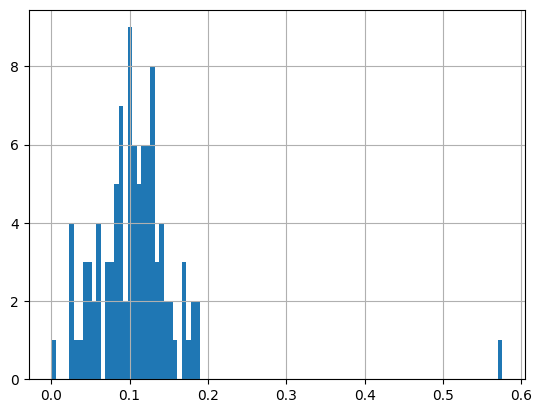

time: 199 ms (started: 2023-05-30 18:09:58 -05:00)


In [39]:
x = df_edges_weight["std"]

plt.hist(x, bins=100)
plt.grid()
plt.show()

In [40]:
df_edges_weight[df_edges_weight["std"] > 0.5]

,target,source,weight1,weight2,weight3,weight4,weight5,std
94,346.0558,367.0185,0.566643,0.746427,-0.558285,0.758787,0.783089,0.575321


time: 12.4 ms (started: 2023-05-30 18:10:09 -05:00)


---
---

Anova

In [42]:
list_raw_copy = list_raw[:]

for k, item in enumerate(list_raw_copy):
    item.columns = [chr(65 + k)]*len(item.columns)

# Filter by graph and concat 
# nodes = list(G.nodes())
# df_raw_filter = list_raw_copy[0].loc[nodes, :]
# df_raw_filter.head()

time: 1.68 ms (started: 2023-05-30 18:10:28 -05:00)


In [43]:
list_raw_copy[0].head()

,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
ionMz,,,,,,,,,,,,,,,,,,,,,
71.0139,3.409257,3.668665,3.497344,3.591732,3.491922,3.598024,3.365301,3.656769,3.732796,3.511081,...,3.439648,3.406881,3.428944,3.374198,3.308351,3.488269,3.361161,3.419129,3.400192,3.541330
85.0296,3.302980,3.426023,3.485153,3.454540,3.526985,3.704151,3.239550,3.707315,3.611192,3.766041,...,3.401228,3.343999,3.401401,3.447933,3.359266,3.499137,3.372912,3.391112,3.463146,3.508664
87.0086,3.438226,3.386856,3.473487,3.336860,3.311966,3.746790,3.495960,3.525951,3.832381,3.661623,...,3.489114,3.342028,3.679428,3.315340,3.648653,3.582518,3.604334,3.409087,3.508260,3.681693
88.0405,3.287130,3.504607,3.447778,3.296884,3.343802,3.590284,3.214049,3.495267,3.607669,3.301898,...,3.466126,3.497897,3.210586,3.217221,3.298416,3.310481,3.490099,3.153815,3.405346,3.386142
89.0245,3.551816,3.720490,3.551694,3.695219,3.535421,3.674769,3.589615,3.774006,3.866228,4.032740,...,3.615529,3.676145,3.700098,3.516271,3.574263,3.536685,3.627775,3.560743,3.598572,3.614897


time: 15.1 ms (started: 2023-05-30 18:10:31 -05:00)


In [44]:
# concat
df_raw_filter = list_raw_copy[0]

for k in range(1, len(subgroups)):
    df_temp = list_raw_copy[k] # .loc[nodes, :]
    # df_raw_filter = df_raw_filter.join(df_temp)
    df_raw_filter = pd.concat([df_raw_filter, df_temp], axis=1)

# df_raw_filter.to_csv("{}/output_greedy/matrix/greedy_{}_matrix_copy.csv".format(dir, group[0]), index=True)
print(df_raw_filter.shape)
df_raw_filter.head()

(48, 194)


,A,A,A,A,A,A,A,A,A,A,...,E,E,E,E,E,E,E,E,E,E
ionMz,,,,,,,,,,,,,,,,,,,,,
71.0139,3.409257,3.668665,3.497344,3.591732,3.491922,3.598024,3.365301,3.656769,3.732796,3.511081,...,3.595276,3.542452,3.529687,3.474362,3.465829,3.498724,3.432969,3.575996,3.508934,3.543323
85.0296,3.302980,3.426023,3.485153,3.454540,3.526985,3.704151,3.239550,3.707315,3.611192,3.766041,...,3.733598,3.552181,3.627571,3.778658,3.676602,3.755036,3.693815,3.477700,3.682596,3.735599
87.0086,3.438226,3.386856,3.473487,3.336860,3.311966,3.746790,3.495960,3.525951,3.832381,3.661623,...,3.386677,3.395326,3.546543,3.581722,3.363048,3.531479,3.679791,3.524656,3.562769,3.373647
88.0405,3.287130,3.504607,3.447778,3.296884,3.343802,3.590284,3.214049,3.495267,3.607669,3.301898,...,3.188928,3.397071,3.289143,3.376759,3.180986,3.456670,3.266702,3.117603,3.212454,3.334253
89.0245,3.551816,3.720490,3.551694,3.695219,3.535421,3.674769,3.589615,3.774006,3.866228,4.032740,...,3.883548,3.932981,3.872215,3.964165,3.793860,3.944729,3.959232,3.838660,3.789651,3.912116


time: 31.7 ms (started: 2023-05-30 18:10:36 -05:00)


In [46]:
def anova_(df_raw_filter):
    columns = np.unique(list(df_raw_filter.columns))
    p_values = []

    for i in range(len(df_raw_filter)):
        row = df_raw_filter.iloc[i,:]
        list_global = []
        for column in columns:
            list_global.append(row[column].values)

        fvalue, pvalue = stats.f_oneway(*list_global)

        p_values.append(pvalue)
    return p_values

time: 1.07 ms (started: 2023-05-30 18:10:55 -05:00)


In [47]:
p_values = anova_(df_raw_filter)
df_raw_filter["p-value"] = p_values
print(df_raw_filter.shape)
df_raw_filter.head(50)

(48, 195)


/tmp/ipykernel_3886341/1654710785.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_raw_filter["p-value"] = p_values


,A,A,A,A,A,A,A,A,A,A,...,E,E,E,E,E,E,E,E,E,p-value
ionMz,,,,,,,,,,,,,,,,,,,,,
71.0139,3.409257,3.668665,3.497344,3.591732,3.491922,3.598024,3.365301,3.656769,3.732796,3.511081,...,3.542452,3.529687,3.474362,3.465829,3.498724,3.432969,3.575996,3.508934,3.543323,3.545163e-22
85.0296,3.302980,3.426023,3.485153,3.454540,3.526985,3.704151,3.239550,3.707315,3.611192,3.766041,...,3.552181,3.627571,3.778658,3.676602,3.755036,3.693815,3.477700,3.682596,3.735599,6.023697e-19
87.0086,3.438226,3.386856,3.473487,3.336860,3.311966,3.746790,3.495960,3.525951,3.832381,3.661623,...,3.395326,3.546543,3.581722,3.363048,3.531479,3.679791,3.524656,3.562769,3.373647,5.203693e-17
88.0405,3.287130,3.504607,3.447778,3.296884,3.343802,3.590284,3.214049,3.495267,3.607669,3.301898,...,3.397071,3.289143,3.376759,3.180986,3.456670,3.266702,3.117603,3.212454,3.334253,3.111329e-13
89.0245,3.551816,3.720490,3.551694,3.695219,3.535421,3.674769,3.589615,3.774006,3.866228,4.032740,...,3.932981,3.872215,3.964165,3.793860,3.944729,3.959232,3.838660,3.789651,3.912116,8.748905e-11
115.0038,3.819676,4.129271,3.914290,3.977906,3.804753,4.139596,3.875524,4.182871,4.250883,3.835564,...,3.606489,3.485295,3.565966,3.521530,3.575419,3.474944,3.480582,3.623663,3.664736,3.398546e-29
118.0510,4.955375,5.147212,4.998634,5.056634,4.912971,5.202488,4.936534,5.191881,5.256444,4.985884,...,5.053224,5.043382,5.051110,4.998913,5.053877,5.040994,5.028575,5.029136,5.079203,9.275149e-34
118.9807,4.019822,4.064533,4.075364,4.072948,4.034428,4.226497,4.005095,4.249100,4.192540,4.337399,...,4.392925,4.424310,4.407918,4.396653,4.421900,4.374143,4.381584,4.415241,4.452614,7.312486e-14
122.0247,3.602819,3.764326,3.724685,3.716671,3.681151,3.769230,3.511215,3.786467,3.893984,3.502017,...,3.382377,3.317227,3.249687,3.282849,3.184975,2.997386,3.297979,3.134177,3.333850,8.901045e-18


time: 77.8 ms (started: 2023-05-30 18:11:20 -05:00)


In [48]:
df_raw_filter["p-value"].isna().sum()

0

time: 2.23 ms (started: 2023-05-30 18:11:57 -05:00)


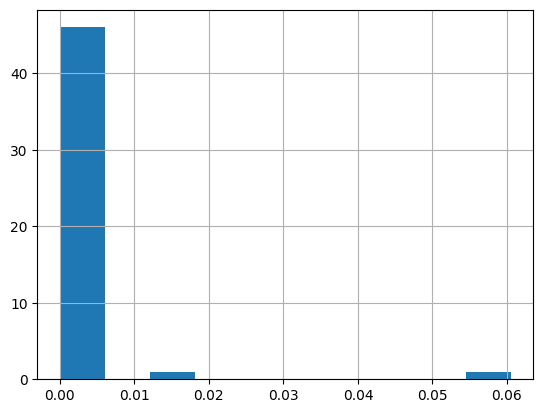

time: 128 ms (started: 2023-05-30 18:13:06 -05:00)


In [51]:
x = df_raw_filter["p-value"]

plt.hist(x, bins=10)
plt.grid()
plt.show()